In [17]:
import skimage
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
import os
import scipy.ndimage.morphology
from skimage.measure import label, regionprops

In [2]:
path = '../data/images/img_0000015.jpg'
if os.environ.get('BATCH_RUN', False):
    path = os.environ['BATCH_RUN']

output_path = os.environ.get('BATCH_RUN_OUTPUT', '')

In [3]:
orig_img = skimage.io.imread(path)
img = orig_img

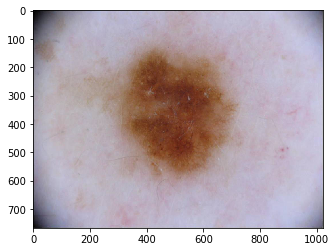

In [4]:
plt.imshow(img)

In [5]:
img = img.mean(2)

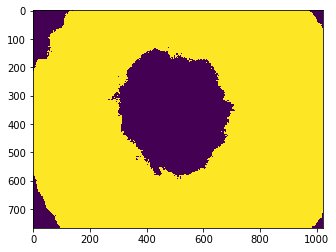

In [6]:
img = img > threshold_otsu(img)
plt.imshow(img)

In [7]:
img = img == False
import scipy.ndimage.morphology

In [15]:
def get_segmentation(img):
    orig_img = img.copy()
    img = img.mean(2)
    img = img > threshold_otsu(img)
    img = img == False
    scipy.ndimage.morphology.binary_fill_holes(img)
    labels = label(img)
    center = tuple(np.array(img.shape) // 2)
    center_patch = labels == labels[center[0], center[1]]
    scipy.ndimage.morphology.binary_fill_holes(center_patch)
    removed = orig_img
    removed[scipy.ndimage.morphology.binary_fill_holes(center_patch) == False] = 0
    return removed

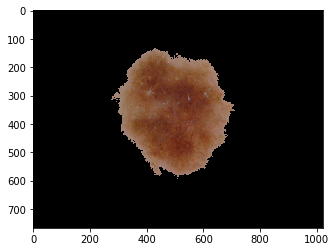

In [20]:
plt.imshow(get_segmentation(orig_img))
segm = get_segmentation(orig_img)

In [28]:
def diameter(img):
    up = 0
    down = img.shape[0] - 1
    left = img.shape[1] - 1
    right = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            cur = img[i][j]
            #print(cur)
            if not np.array_equal([0, 0, 0], cur):
                if i < down:
                    down = i
                if i > up:
                    up = i
                if j < left:
                    left = j
                if j > right:
                    right = j
    print(down, up)
    print(left, right)
    print()
    return [up, down, left, right]

In [57]:
import sklearn.preprocessing
from skimage.color import rgb2gray

In [64]:
def sk_diameter(img):
    im2  = sklearn.preprocessing.binarize(rgb2gray(img), threshold=0.0, copy=True)
    label_img = label(im2, connectivity=im2.ndim)
    res = skimage.measure.regionprops(label_img, intensity_image=None, cache=True)
    print(res[0].equivalent_diameter)

In [65]:
sk_diameter(segm)

408.30178367275573
